<a href="https://colab.research.google.com/github/tuncermerve/HighLevelProgramming2021/blob/main/respratev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adding spesific libraries

In [ ]:
#Importing necessary Libraries
import pandas as pd
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy import fft, signal, interpolate, fftpack
import scipy as spy
from statistics import mean

# Analysis for center_sternum.txt

# Data Preparation

In [ ]:
file = "center_sternum.txt"  #Actual File
data = pd.read_csv(file, delimiter="\t") #read csv 

data

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


We have decided to select the columns related with magnitude of linear acceleration,  magnitude of angular velocity, magnitude of magnetic field.
The reason why is because the spatial orientations give the orientation of the body, which is not necessary for the solution

# Dropping the unnecessary columns

In [ ]:
#dropping the columns which wont be used anymore (qw,qi,qj,qk) 

df = pd.DataFrame(data)
df.drop(df.columns[[12,13,14,15]],inplace=True,axis=1) 
df

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176
...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124


we dropped the columns which wont be used anymore (qw,qi,qj,qk) .


# Plot selected data wrt the time window

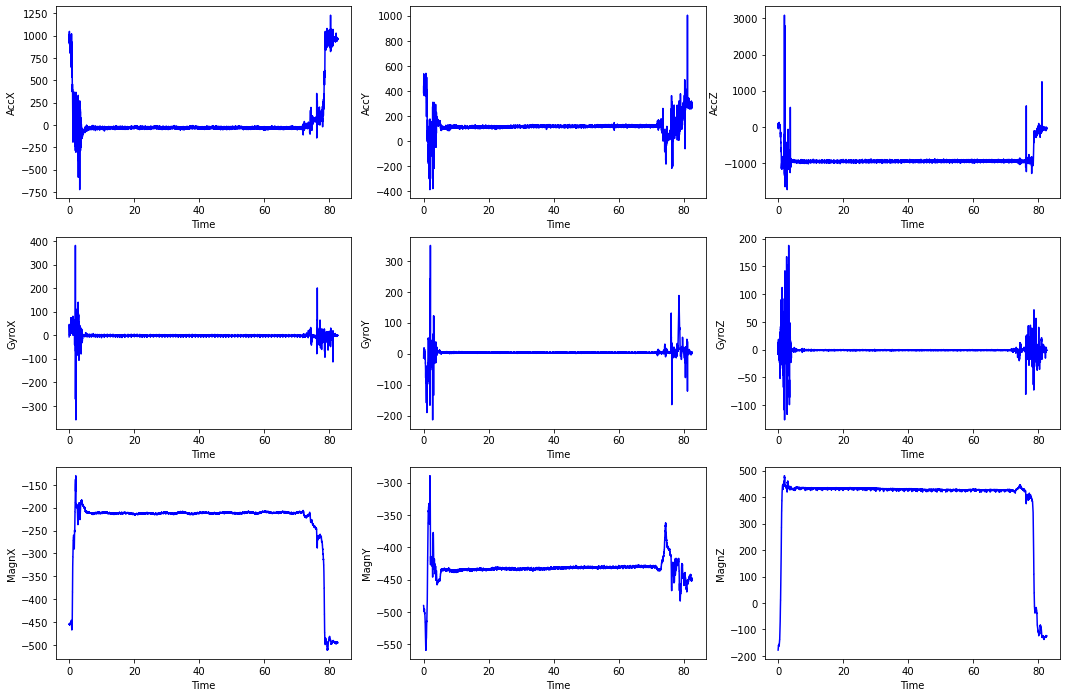

In [ ]:
sampling_frequency = 200  #Given in the configuration file
limits = np.linspace(0,df.shape[0]/sampling_frequency ,df.shape[0])  #starts from 0, goes untill stop number, number of samples to generate is df.shape[0]

#labels = df[:0]
labels = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagnX', 'MagnY', 'MagnZ']
fig, axes = plt.subplots(3, 3, figsize = (18, 12))
for i ,axs in enumerate(axes.flat):
    axs.plot(limits, df[labels[i]], color = 'blue')
    axs.set_xlabel('Time')
    axs.set_ylabel(labels[i])

In the following cells, we wanted to see some plots to explore the data in details,based on the variables AccX,AccY and AccZ which is the linear acceleration.


# Choosing a proper time window

It can be easily seen that the first 5 seconds and the last 20 seconds, starting with 70th second are very noisy. This analysis will affect the selecting procedure of the time window.
When we examined the graphs above, we extracted the frequency ranges of noisy data from 0-5 and after 65 seconds in these graphs.

In [ ]:
min_time = 1000 #for the first 5 seconds  (5*200)
max_time = 13000 #for the 65th time frame 65*200
df = df.iloc[min_time:max_time].copy()
df



,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
1000,5,200,1576222776,-44.347,137.311,-952.698,0.671756,4.351145,0.564886,-208,-451,429
1001,5,200,1576222776,-45.750,131.821,-954.040,0.885496,4.106870,0.091603,-208,-450,429
1002,5,200,1576222776,-45.018,133.895,-951.112,1.450382,4.015267,-0.549618,-208,-450,429
1003,5,200,1576222776,-49.166,133.529,-947.208,1.603053,4.061069,-0.595420,-208,-450,430
1004,5,200,1576222776,-66.612,139.080,-925.675,1.587786,3.648855,-0.732824,-208,-450,430
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,5,200,1576222831,-31.842,118.279,-941.901,-1.679389,3.664122,-0.503817,-210,-430,426
12996,5,200,1576222831,-40.626,116.998,-949.404,-1.129771,4.015267,-0.519084,-210,-430,426
12997,5,200,1576222831,-33.062,116.693,-949.404,-1.114504,3.587786,-0.717557,-210,-429,428
12998,5,200,1576222831,-25.254,118.523,-961.787,-1.557252,3.938931,-0.641221,-210,-429,428


# Calibrating linear acceleration, angular velocity and magnetic field

In the calibration process, the deviations of the test-measurement instrument or devices used in the measurement are determined and the errors are corrected. Thus, since the accuracy of all devices in the measuring chain is finalized, the reliability of the measurement results is ensured.

In [ ]:
accelometer_calibration = np.array([[1.000966,-0.002326418,-0.0006995499],
                    [-0.002326379,0.9787045,-0.001540918],
                    [-0.0006995811,-0.001540928,1.00403]])
transpose_a = accelometer_calibration.T
accelometer_offset = np.array([-3.929942,-13.74679,60.67546])

gyroscope_offset = np.array([-2.242224,2.963463,-0.718397])

magneticfield_calibration = np.array([[0.9192851,-0.02325168,0.003480837],
                   [-0.02325175,0.914876,0.004257396],
                   [0.003481006,0.004257583,0.8748001]])

transpose_m = magneticfield_calibration
magneticfield_offset = np.array([-95.67974,-244.9142,17.71132])




df[['GyroX','GyroY','GyroZ']] = df[['GyroX','GyroY','GyroZ']] + gyroscope_offset
df[['AccX','AccY','AccZ']] = np.dot(df[['AccX','AccY','AccZ']], transpose_a) + accelometer_offset
df[['MagnX','MagnY','MagnZ']] = np.dot(df[['MagnX','MagnY','MagnZ']], transpose_m) + magneticfield_offset
df



,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
1000,5,200,1576222776,-47.972764,122.211301,-896.042475,-1.570468,7.314608,-0.153511,-274.911150,-650.860423,390.356463
1001,5,200,1576222776,-49.363409,116.843545,-897.380442,-1.356728,7.070333,-0.626794,-274.934402,-649.945547,390.360721
1002,5,200,1576222776,-48.637575,118.867164,-894.444350,-0.791842,6.978730,-1.268015,-274.934402,-649.945547,390.360721
1003,5,200,1576222776,-52.791461,118.512592,-890.521151,-0.639171,7.024532,-1.313817,-274.930921,-649.941290,391.235521
1004,5,200,1576222776,-70.282292,123.952786,-868.897722,-0.654438,6.612318,-1.451221,-274.930921,-649.941290,391.235521
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,5,200,1576222831,-35.418961,103.538868,-885.181384,-3.921613,6.627585,-1.222214,-277.248450,-631.614297,387.814507
12996,5,200,1576222831,-44.203217,102.317144,-892.706502,-3.371995,6.978730,-1.237481,-277.248450,-631.614297,387.814507
12997,5,200,1576222831,-36.631201,102.001043,-892.711324,-3.356728,6.551249,-1.435954,-277.264740,-630.690906,389.568364
12998,5,200,1576222831,-28.811253,103.792989,-905.152510,-3.799476,6.902394,-1.359618,-277.264740,-630.690906,389.568364


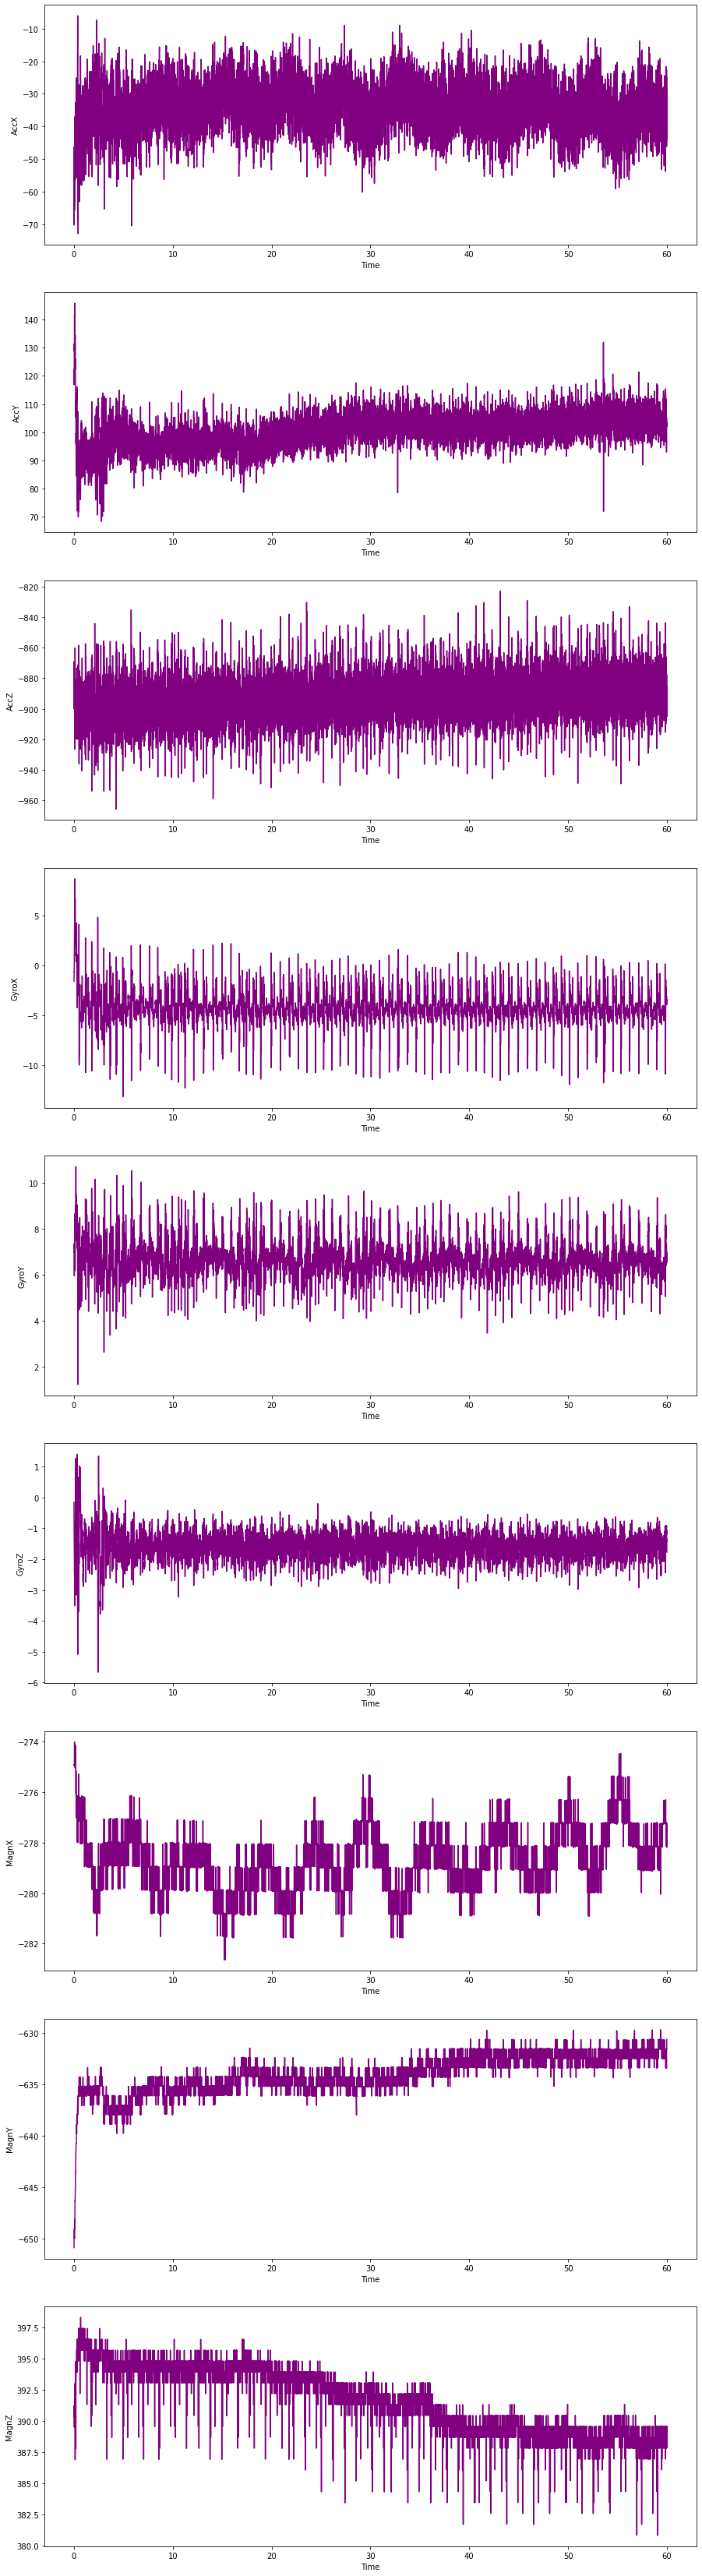

In [ ]:
fig, axes = plt.subplots(9, 1, figsize = (15, 60))
limits = np.linspace(0,df.shape[0]/sampling_frequency ,df.shape[0]) 
for i ,axs in enumerate(axes.flat):
    axs.plot(limits, df[labels[i]], color = 'purple')
    axs.set_xlabel('Time')
    axs.set_ylabel(labels[i])
    


After the noisy data we extracted here, we poured the rest into the table. Graph of range values.

# 2.0 Time and Frequency Analysis

# Statistical Analysis

Mean median variance standard deviation 25th and 75th percentiles

In [ ]:
df.drop(df.columns[[0,1,2]],inplace=True,axis=1)
#describe functions gives mean median std 25 and 75 percentiles
df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,-34.362789,100.236260,-893.446564,-4.279313,6.666018,-1.580174,-278.684194,-634.047740,391.593380
std,7.299004,5.979027,14.677326,1.568470,0.762057,0.432705,1.219443,1.858629,2.645261
min,-72.909656,68.267420,-965.972795,-13.127724,1.238272,-5.664962,-282.650268,-650.860423,380.808368
25%,-39.019581,96.645065,-902.262602,-4.944514,6.230639,-1.832901,-279.110272,-635.197494,389.548630
50%,-34.232411,100.537349,-893.801576,-4.379629,6.612318,-1.573359,-278.966165,-634.255109,392.156778
75%,-29.541448,103.959481,-885.421664,-3.662071,6.993997,-1.329084,-278.046880,-632.501664,393.914116
max,-6.053036,145.757075,-822.777963,8.658536,10.703921,1.403740,-274.011636,-629.710532,398.295078


 The most interesting descriptors for this type of data, motivating the choice is mean.

Correlation coefficients analysis we made it with heat map because it looks way much better and for the analyzing correlation its make easier.

           AccX      AccY      AccZ     GyroX     GyroY     GyroZ     MagnX  \
AccX   1.000000 -0.181279 -0.385553  0.167049 -0.004051 -0.000826 -0.390199   
AccY  -0.181279  1.000000  0.174155  0.016331 -0.000945 -0.112597  0.223666   
AccZ  -0.385553  0.174155  1.000000 -0.082519  0.097114  0.004089  0.097910   
GyroX  0.167049  0.016331 -0.082519  1.000000  0.397650  0.265957  0.015488   
GyroY -0.004051 -0.000945  0.097114  0.397650  1.000000  0.405813  0.044450   
GyroZ -0.000826 -0.112597  0.004089  0.265957  0.405813  1.000000  0.014632   
MagnX -0.390199  0.223666  0.097910  0.015488  0.044450  0.014632  1.000000   
MagnY  0.061852  0.211834  0.176900 -0.178052 -0.164316 -0.068802  0.059070   
MagnZ  0.034458 -0.494558 -0.249058  0.035769  0.037452  0.024974 -0.240942   

          MagnY     MagnZ  
AccX   0.061852  0.034458  
AccY   0.211834 -0.494558  
AccZ   0.176900 -0.249058  
GyroX -0.178052  0.035769  
GyroY -0.164316  0.037452  
GyroZ -0.068802  0.024974  
MagnX  0.0590

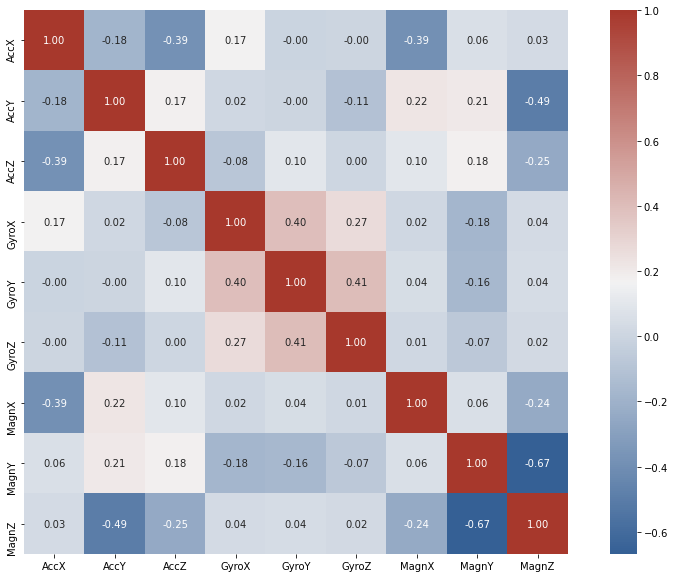

In [ ]:
#We wanted to find a correlation matrix in order to see the correlation among the variables. 
#Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize the data as a diagnostic for adcanced analyses
def plot_correlation_matrix(data):
    #this correlation matrix has coefficients ranges from 1 to -1, while -1 refers to negative correlation and +1 perfect positive correllation.
    plt.subplots(figsize=(15, 10))
    corr_matrix = data.corr() #Compute pairwise correlation of columns, excluding NA/null values
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True) #custom diverging palette with red blue and white to use it in the heatmap
    
    sns.heatmap(corr_matrix, annot=True, 
                fmt='.2f', square=True, cmap=cmap) #heatmap: a graphical representation of data that uses a system of color-coding to represent different values.
    return corr_matrix,corr_matrix

corr_matrix,correlation_coefficients = plot_correlation_matrix(df)
print(correlation_coefficients)


# Fourier Analysis

Generally, for signal analysis the FFT is used on signals of infinite 
length.  So, when you chop up your signal into finite-length segments, 
you are making an approximation.  Detrending the signal makes this 
approximation better



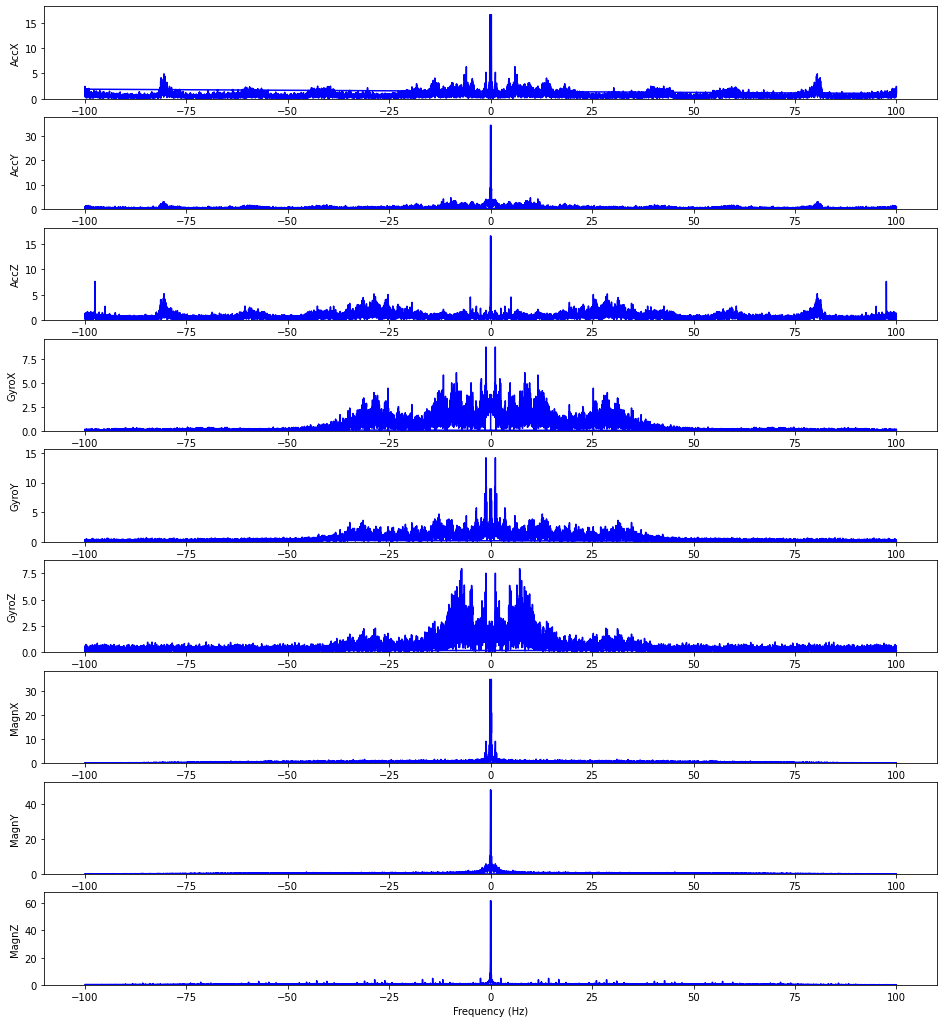

In [ ]:
#Fourier analysis can be achieved by using pythons fft and fft freq
from scipy import fft, signal, interpolate
from sklearn import preprocessing
#normalizing the data:
df_mean = df.apply(np.mean)
df = df- df_mean
normalized_df = pd.DataFrame(preprocessing.normalize(df, axis=0), columns=df.columns)


fourier = normalized_df.apply(np.fft.fft)
absolute = fourier.apply(np.abs)

frequency = fft.fftfreq(absolute.shape[0] , d=1/200)


fig, axs = plt.subplots(9,1, figsize = (16,18))
for i, ax in enumerate(axs.flat):   
    az = np.array(absolute.iloc[:,i])
    find_peaks, _property = signal.find_peaks(az, distance=200)
    
        
    ax.set_ylim([0, az[find_peaks].max()*1.1])
    ax.plot(frequency, az, color='blue')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(absolute.columns[i])


The Fourier transform states that all disordered waves can actually be written as the sum of the series of sines. All continuous waves, all audio files are actually the sum of sinuses that differ from each other in frequency and power. This sum actually goes to infinity because it is impossible to index a continuous wave perfectly to the sum of sines. In general, the coefficient of this sine decreases as the frequency value increases. In these examples, the reason why the Fourier transform is symmetric (f=10k is equivalent to f=-10k) is that the imaginary part of the analyzed wave is 0.
If we evaluate the graphics in the light of this information:

In the first graph, we see a graph with larger power values spread over a wider area as a result of the transformation. If we apply the inverse Fourier to this function, we will encounter a very noisy continuous wave, because frequencies of very large amplitude are seen at many different frequency values, which indicates that our frequency has an irregular structure.


Especially the graphics in the last picture belong to 2 very regular continuous waves, which when they are put into the inverse Fourier transform, we encounter 2 waves that are not very dispersed. The reason for this is that we have not encountered a large sine value other than our fundamental frequency value (f=0).

Since AccX and AccZ peak in the 80 Hz range, they can be taken because they are closer to a healthy human heartbeat.

In [ ]:
normalized_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
0,-0.017022,0.033553,-0.001615,0.015767,0.007770,0.030099,0.028246,-0.082579,-0.004269
1,-0.018762,0.025357,-0.002447,0.017011,0.004844,0.020114,0.028072,-0.078086,-0.004254
2,-0.017854,0.028447,-0.000621,0.020298,0.003746,0.006586,0.028072,-0.078086,-0.004254
3,-0.023049,0.027905,0.001820,0.021187,0.004295,0.005620,0.028098,-0.078065,-0.001235
4,-0.044926,0.036212,0.015269,0.021098,-0.000643,0.002721,0.028098,-0.078065,-0.001235
...,...,...,...,...,...,...,...,...,...
11995,-0.001321,0.005043,0.005141,0.002082,-0.000460,0.007552,0.010748,0.011952,-0.013041
11996,-0.012308,0.003177,0.000460,0.005281,0.003746,0.007230,0.010748,0.011952,-0.013041
11997,-0.002837,0.002695,0.000457,0.005370,-0.001375,0.003043,0.010626,0.016488,-0.006989
11998,0.006943,0.005431,-0.007281,0.002793,0.002832,0.004653,0.010626,0.016488,-0.006989


In [ ]:
absolute = absolute.drop(absolute[frequency <= 0].index)
frequency = frequency[np.where(frequency> 0)]

Since there will be no negative value in time values, values less than zero were excluded from the data set.

In [ ]:
frequency

array([1.66666667e-02, 3.33333333e-02, 5.00000000e-02, ...,
       9.99500000e+01, 9.99666667e+01, 9.99833333e+01])

In [ ]:
absolute

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
1,13.066981,34.158293,16.459126,3.812383,3.863507,2.724160,33.076659,47.717509,61.811517
2,8.614369,17.557388,7.750322,3.521529,2.900153,1.721515,18.295454,26.607421,17.178668
3,3.986099,9.881923,5.554410,2.743716,1.213916,1.185899,4.489675,18.685045,12.213641
4,3.742931,7.589494,3.809830,2.620673,2.504556,1.559146,11.410877,11.912789,14.131578
5,2.479818,5.787683,2.795721,2.637284,1.175126,0.864367,3.260473,10.318140,7.243738
...,...,...,...,...,...,...,...,...,...
5995,0.720182,1.045807,1.295596,0.088396,0.191864,0.073808,0.019067,0.068229,0.113364
5996,0.865726,0.491801,0.278210,0.034553,0.053951,0.246182,0.064614,0.072402,0.016330
5997,0.668904,0.274199,0.789513,0.131636,0.073906,0.162325,0.046646,0.076444,0.045408
5998,2.416904,1.057073,0.743013,0.190291,0.182045,0.154402,0.024022,0.099432,0.028687


Fourier Analysis

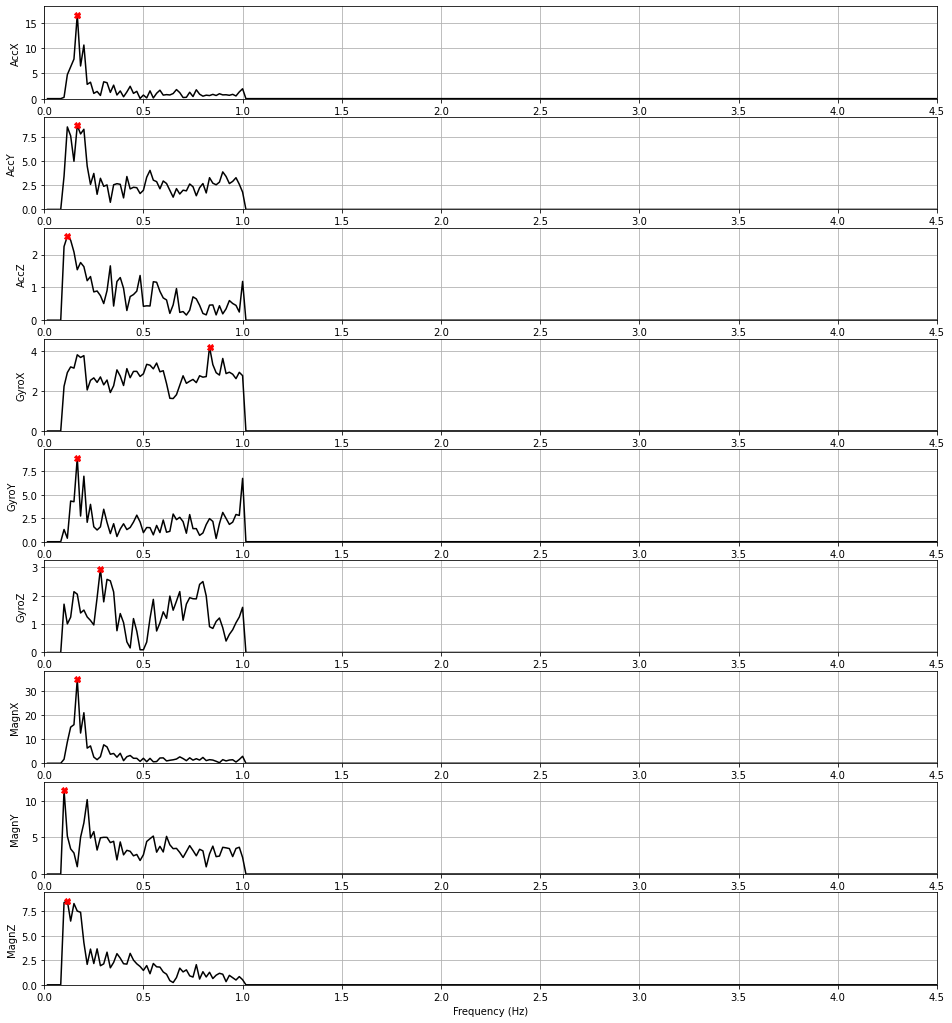

In [ ]:
f_low_cut = 0.1
f_high_cut = 1

peak_freq = []

fig, axs = plt.subplots(9,1, figsize = (16,18))

for i, ax in enumerate(axs.flat): 
    
    
    #### Filtering frequencies
    _d = np.array(absolute.iloc[:,i])
    _mask = np.where(np.abs(frequency) < f_low_cut)
    _d[_mask] = 0
    _mask = np.where(np.abs(frequency) > f_high_cut)
    _d[_mask] = 0

    
    # Finding freq. with peak power
    peak_freq.append(frequency[_d.argmax()])
        
    ax.plot(frequency, _d , color='black')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(absolute.columns[i])
    ax.grid()
    
    ax.set_xlim([0,4.5])
    ax.set_ylim([0, (_d[_d.argmax()])*1.1])
    ax.plot(frequency[_d.argmax()], _d[_d.argmax()], 'X', color='r')

The highest peaked value is the value that affects the function the most after the inverse Fourier transform. Therefore, we chose AccX and MagnZ. When we look at the images, the highest peaks are here.

In [ ]:
F = np.array(np.unique(peak_freq , return_counts=True))[0,-2:]
HR = F.max()
RR = F.min()
print(f'HR frequency is {HR:.2f} Hz, which is equal to {HR*60:.2f} beats per minute.')
print(f'RR frequency is {RR:.2f} Hz, which is equal to {RR*60:.2f} breath per minute.')

HR frequency is 0.83 Hz, which is equal to 50.00 beats per minute.
RR frequency is 0.28 Hz, which is equal to 17.00 breath per minute.


In [ ]:
normalized_df['AccX']

0       -0.017022
1       -0.018762
2       -0.017854
3       -0.023049
4       -0.044926
           ...   
11995   -0.001321
11996   -0.012308
11997   -0.002837
11998    0.006943
11999   -0.014772
Name: AccX, Length: 12000, dtype: float64

Filter

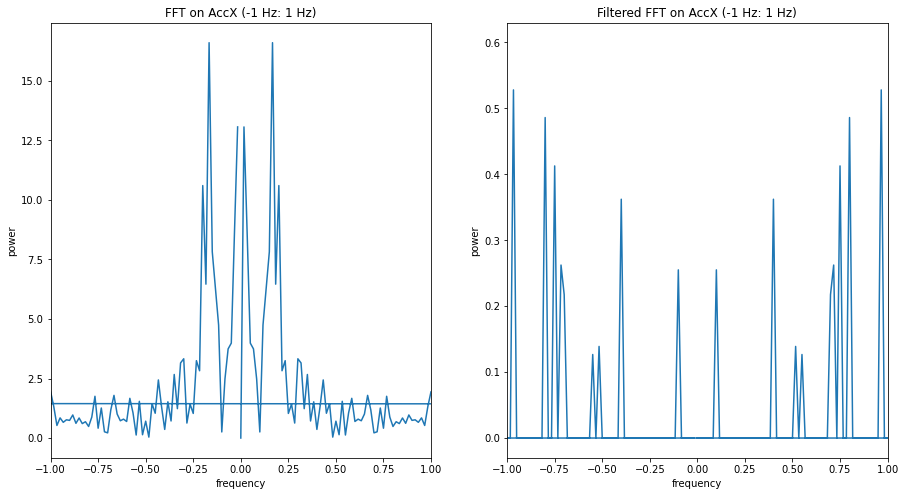

In [ ]:
df_accx = normalized_df['AccX'].to_numpy()
df_accx -= np.mean(df_accx)
df_accx_fft = fftpack.fft(df_accx)
power = np.abs(df_accx_fft)
freq = fftpack.fftfreq(df_accx.size, d=1/200)

x1,x2 = 0.1,0.6
filter_fft = np.where((np.abs(df_accx_fft)<x1) | (np.abs(df_accx_fft) >x2))
df_accx_fft[filter_fft] = 0

fig, ax = plt.subplots(1,2,figsize = (15,8))
ax[0].plot(freq,power)
ax[0].set_xlim(-1,1)
ax[0].set(xlabel="frequency", ylabel="power",title="FFT on AccX (-1 Hz: 1 Hz)")
ax[1].plot(freq,np.abs(df_accx_fft))
ax[1].set_xlim(-1,1)
ax[1].set(xlabel="frequency", ylabel="power",title="Filtered FFT on AccX (-1 Hz: 1 Hz)")
plt.show()

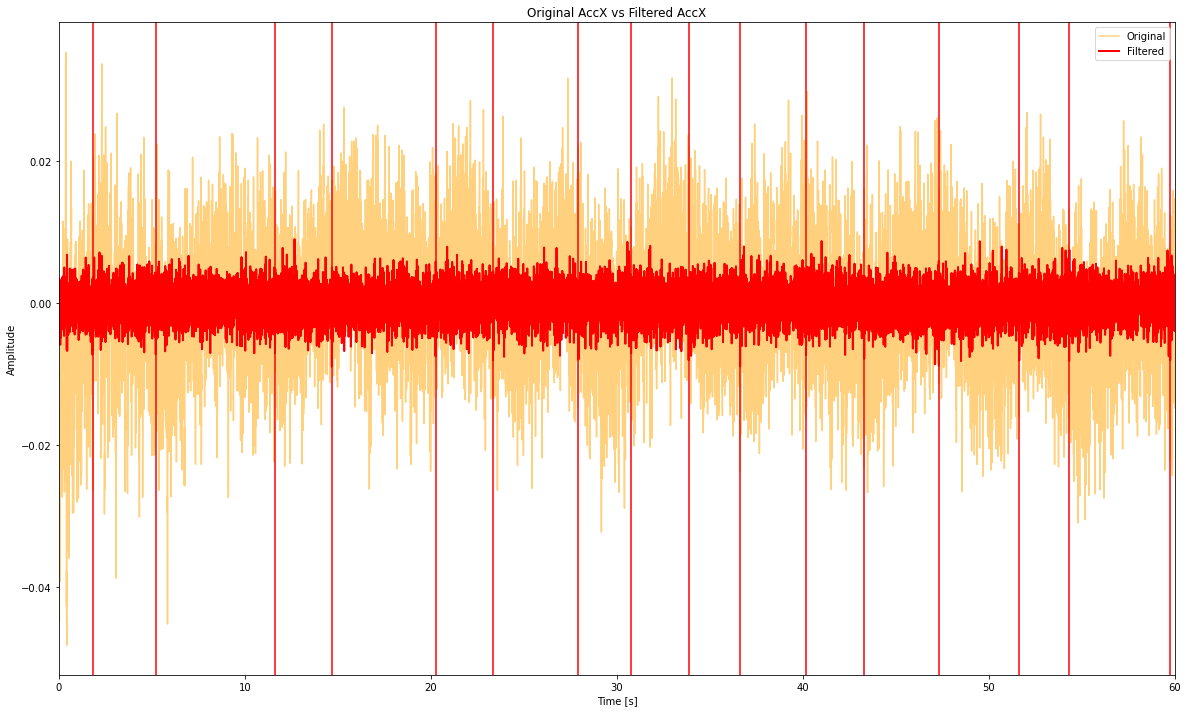

In [ ]:
filtered_sig = fftpack.ifft(df_accx_fft)
filtered_sig = np.real(filtered_sig)

plt.figure(figsize=(20, 12))
plt.plot(limits, normalized_df['AccX'], alpha=0.5, color='orange', label='Original')
plt.plot(limits, filtered_sig, linewidth=2, color='r', label='Filtered')

## Find minima of the filtered signal and plot them with a red line
idx_minima = signal.argrelextrema(filtered_sig, np.less, order = 500)
for i in idx_minima[0]:
    plt.axvline(limits[i], color = 'r')
    
plt.xlabel('Time [s]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(limits[0],limits[-1])
plt.title('Original AccX vs Filtered AccX')
plt.legend(loc='best')
plt.show()

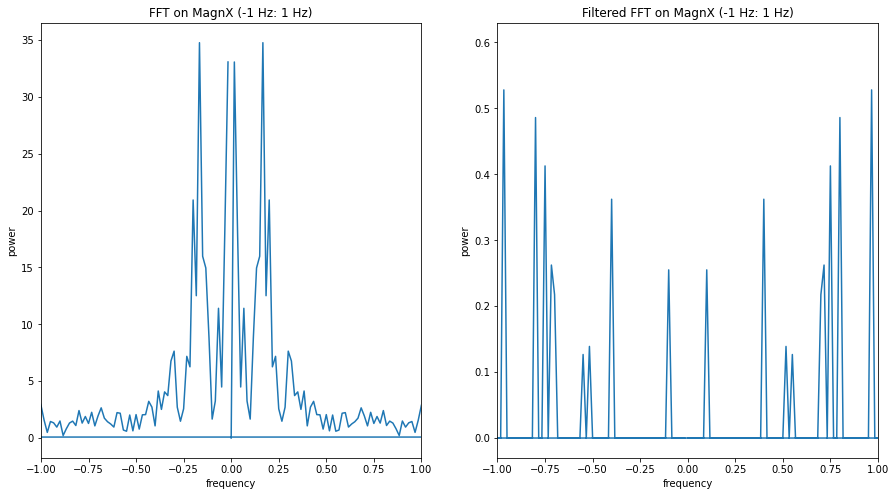

In [ ]:
df_magnx = normalized_df['MagnX'].to_numpy()
df_magnx -= np.mean(df_magnx)
df_magnx_fft = fftpack.fft(df_magnx)
power = np.abs(df_magnx_fft)
freq = fftpack.fftfreq(df_magnx.size, d=1/200)

x1,x2 = 0.1,0.6
filter_fft = np.where((np.abs(df_magnx_fft)<x1) | (np.abs(df_magnx_fft) >x2))
df_magnx_fft[filter_fft] = 0

fig, ax = plt.subplots(1,2,figsize = (15,8))
ax[0].plot(freq,power)
ax[0].set_xlim(-1,1)
ax[0].set(xlabel="frequency", ylabel="power",title="FFT on MagnX (-1 Hz: 1 Hz)")
ax[1].plot(freq,np.abs(df_accx_fft))
ax[1].set_xlim(-1,1)
ax[1].set(xlabel="frequency", ylabel="power",title="Filtered FFT on MagnX (-1 Hz: 1 Hz)")
plt.show()

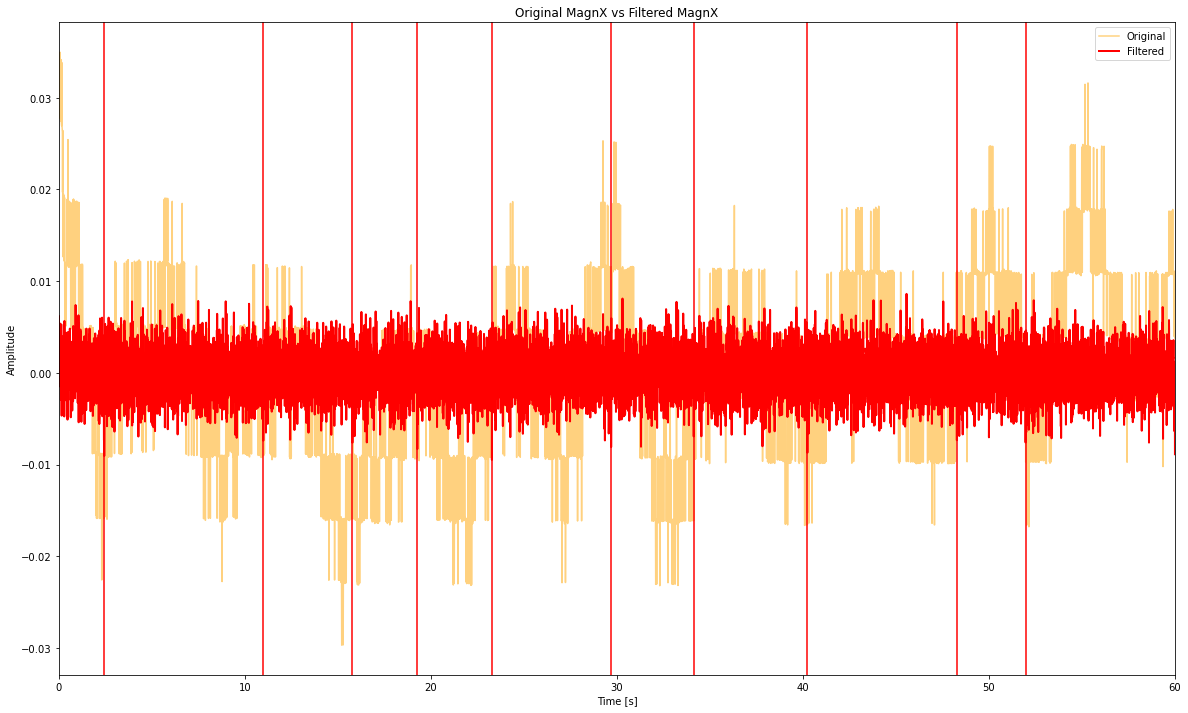

In [ ]:
filtered_sig = fftpack.ifft(df_magnx_fft)
filtered_sig = np.real(filtered_sig)

plt.figure(figsize=(20, 12))
plt.plot(limits, normalized_df['MagnX'], alpha=0.5, color='orange', label='Original')
plt.plot(limits, filtered_sig, linewidth=2, color='r', label='Filtered')

## Find minima of the filtered signal and plot them with a red line
idx_minima = signal.argrelextrema(filtered_sig, np.less, order = 500)
for i in idx_minima[0]:
    plt.axvline(limits[i], color = 'r')
    
plt.xlabel('Time [s]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(limits[0],limits[-1])
plt.title('Original MagnX vs Filtered MagnX')
plt.legend(loc='best')
plt.show()

Respiratory rate per minute (RPM)

Duration of the dataset (excluding start-end noise): 60 seconds
Breaths in these 60 seconds:  10


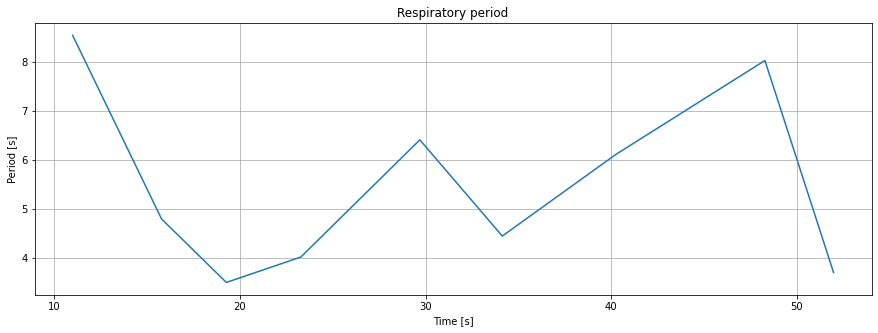

In [ ]:
total_breaths = len(idx_minima[0])

print('Duration of the dataset (excluding start-end noise): 60 seconds')
print('Breaths in these 60 seconds: ',total_breaths)

gaps = []

for i in idx_minima[0]:
    gaps.append(limits[i])
    
periods_diff = []

for i in range(len(gaps)):
    if(i>0):
        periods_diff.append(gaps[i]-gaps[i-1])
        
#plot the period vs time
plt.figure(figsize=(15,5))
plt.plot(gaps[1:],periods_diff)
plt.title("Respiratory period")
plt.xlabel('Time [s]')
plt.ylabel('Period [s]')
plt.grid()
plt.show()

Respiratory rate variability (RRV)

Mean RRV (intended as period variability) calculated on whole dataset: 2.24 s


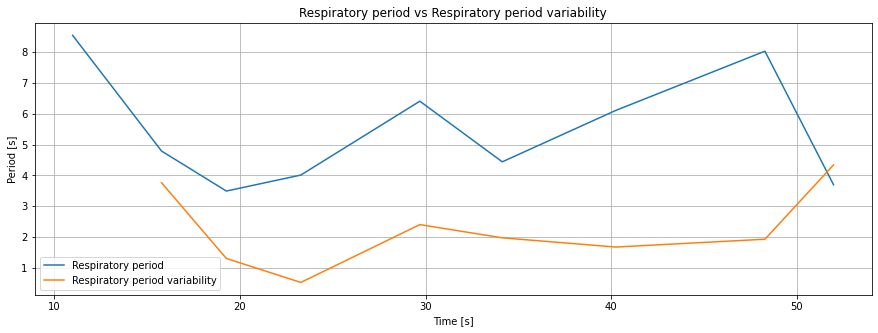

In [ ]:
from scipy.signal.waveforms import gausspulse
#plot the period variability vs time
periods_diff_diff = []
for i in range(len(periods_diff)):
    if(i>0):
        periods_diff_diff.append(abs(periods_diff[i]-periods_diff[i-1]))
        
mean_rrv = np.mean(periods_diff_diff) 
print("Mean RRV (intended as period variability) calculated on whole dataset:", round(mean_rrv,2), "s")

plt.figure(figsize=(15,5))
plt.plot(gaps[1:],periods_diff,label='Respiratory period')
plt.title("Respiratory period vs Respiratory period variability")
plt.plot(gaps[2:],periods_diff_diff,label='Respiratory period variability')
plt.xlabel('Time [s]')
plt.ylabel('Period [s]')
plt.grid()
plt.legend()
plt.show()

periods_diff = []

It does not follow a particular distribution.

# Analysis for 4_chest_sweater.txt

In [ ]:
file = "4_Chest_sweater.txt"  #Actual File
data = pd.read_csv(file, delimiter="\t") #read csv
data

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,100,1555414552,687.836,380.823,580.354,-7.926829,8.048780,0.975610,-592,122,-113,0.788006,0.002899,-0.432874,-0.437788
1,5,100,1555414552,-812.703,-108.946,726.876,-11.707320,-81.829270,8.780488,125,60,-128,0.183978,-0.428877,0.002594,0.884426
2,5,100,1555414552,-812.520,-108.824,733.952,-37.073170,-145.487800,14.756100,123,59,-136,0.128994,-0.427229,0.000702,0.894894
3,5,100,1555414552,-787.144,-45.628,616.954,-56.341460,-174.634200,23.048780,118,58,-145,0.113618,-0.421033,-0.001770,0.899899
4,5,100,1555414552,-800.259,-137.433,411.689,-1.097561,37.073170,1.341463,113,57,-157,0.107202,-0.424787,-0.001251,0.898923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,5,100,1555415471,-890.722,-81.008,446.764,-2.682927,2.926829,0.365854,144,47,-50,0.017279,0.534410,0.040437,-0.844081
14934,5,100,1555415471,-885.964,-76.006,459.025,-3.902439,3.292683,0.365854,146,45,-51,0.016416,0.535050,0.041231,-0.843654
14935,5,100,1555415471,-879.681,-77.714,475.068,-3.048780,2.804878,0.365854,144,46,-54,0.015920,0.534349,0.041780,-0.844081
14936,5,100,1555415471,-894.992,-76.311,502.701,0.121951,1.463415,0.609756,144,45,-53,0.015192,0.531663,0.041749,-0.845790


# Dropping unnecessary columns

In [ ]:
#dropping the columns which wont be used anymore (qw,qi,qj,qk) 

df2 = pd.DataFrame(data)
df2.drop(df2.columns[[12,13,14,15]],inplace=True,axis=1) 
df2

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
0,5,100,1555414552,687.836,380.823,580.354,-7.926829,8.048780,0.975610,-592,122,-113
1,5,100,1555414552,-812.703,-108.946,726.876,-11.707320,-81.829270,8.780488,125,60,-128
2,5,100,1555414552,-812.520,-108.824,733.952,-37.073170,-145.487800,14.756100,123,59,-136
3,5,100,1555414552,-787.144,-45.628,616.954,-56.341460,-174.634200,23.048780,118,58,-145
4,5,100,1555414552,-800.259,-137.433,411.689,-1.097561,37.073170,1.341463,113,57,-157
...,...,...,...,...,...,...,...,...,...,...,...,...
14933,5,100,1555415471,-890.722,-81.008,446.764,-2.682927,2.926829,0.365854,144,47,-50
14934,5,100,1555415471,-885.964,-76.006,459.025,-3.902439,3.292683,0.365854,146,45,-51
14935,5,100,1555415471,-879.681,-77.714,475.068,-3.048780,2.804878,0.365854,144,46,-54
14936,5,100,1555415471,-894.992,-76.311,502.701,0.121951,1.463415,0.609756,144,45,-53


# Plot selected data wrt the time window

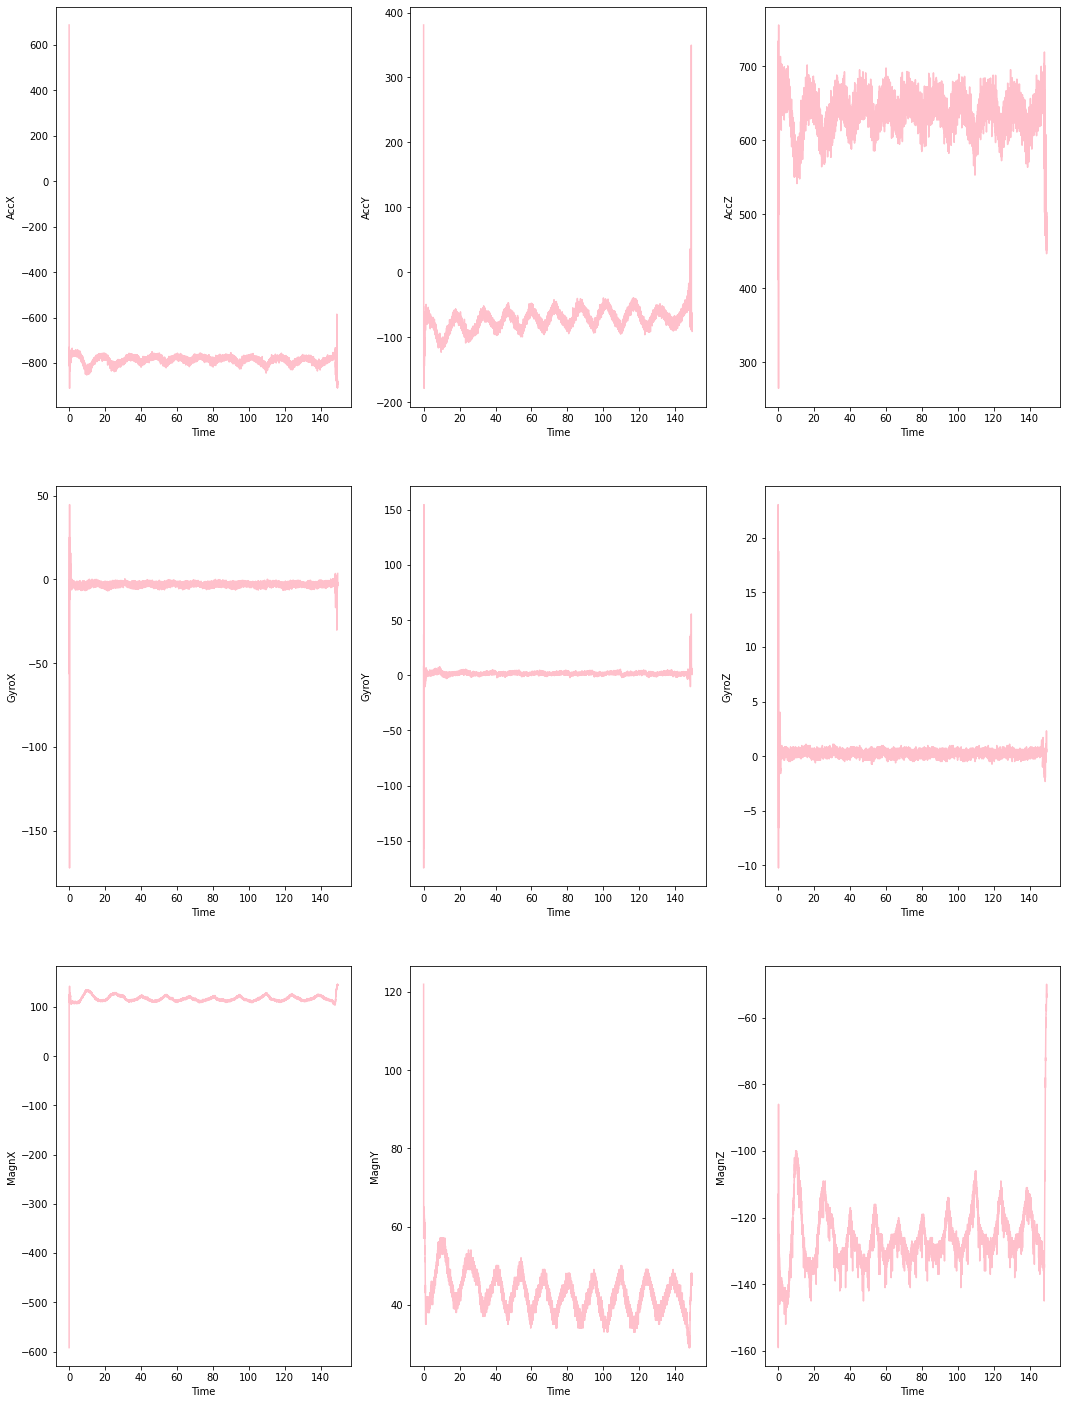

In [ ]:
#In the following cells, we wanted to see some plots to explore the data in details, 
#based on the variables AccX,AccY and AccZ which is the linear acceleration

sampling_frequency = 100
limits = np.linspace(0, df2.shape[0]/sampling_frequency,df2.shape[0])  #starts from 0, goes untill stop number, number of samples to generate is df.shape[0]

labels = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagnX', 'MagnY', 'MagnZ']
fig, axes = plt.subplots(3, 3, figsize = (18, 25))
for i ,axs in enumerate(axes.flat):
    axs.plot(limits, df2[labels[i]], color = 'pink')
    axs.set_xlabel('Time')
    axs.set_ylabel(labels[i])

# Choosing a proper time window


In [ ]:
min_time = 0 #for the first 0 seconds  
max_time = 7000 #for the 70th time frame  70*100
df2 = df2.iloc[min_time:max_time].copy()
df2


,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
0,5,100,1555414552,687.836,380.823,580.354,-7.926829,8.048780,0.975610,-592,122,-113
1,5,100,1555414552,-812.703,-108.946,726.876,-11.707320,-81.829270,8.780488,125,60,-128
2,5,100,1555414552,-812.520,-108.824,733.952,-37.073170,-145.487800,14.756100,123,59,-136
3,5,100,1555414552,-787.144,-45.628,616.954,-56.341460,-174.634200,23.048780,118,58,-145
4,5,100,1555414552,-800.259,-137.433,411.689,-1.097561,37.073170,1.341463,113,57,-157
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,5,100,1555415393,-775.798,-63.196,665.998,-1.463415,0.365854,0.121951,115,44,-128
6996,5,100,1555415393,-791.414,-67.649,654.530,-0.365854,0.000000,0.487805,115,41,-128
6997,5,100,1555415393,-789.096,-80.154,618.540,-1.585366,1.097561,0.609756,114,42,-127
6998,5,100,1555415393,-782.081,-74.786,626.653,-2.195122,1.463415,0.365854,115,43,-128


# Calibrating linear acceleration, angular velocity and magnetic field

In [ ]:
accelometer_calibration = np.array([[1.002982,9.415505E-05,0.00434674],
                    [9.04459E-05,1.002731,-0.001444198],
                    [0.004346536,-0.001444751,1.030587]])
transpose_a = accelometer_calibration.T
accelometer_offset = np.array([3.602701,-20.96658,54.97186])

gyroscope_offset = np.array([-2.804399,1.793105,0.3411708])

magneticfield_calibration = np.array([[1.013437,-0.04728858,-0.001861475],
                   [-0.04728862,1.004832,0.008222118],
                   [-0.001861605,0.008221965,0.9439077]])

transpose_m = magneticfield_calibration
magneticfield_offset = np.array([-150.4098,74.62431,630.9805])




df2[['GyroX','GyroY','GyroZ']] = df2[['GyroX','GyroY','GyroZ']] + gyroscope_offset
df2[['AccX','AccY','AccZ']] = np.dot(df2[['AccX','AccY','AccZ']], transpose_a) + accelometer_offset
df2[['MagnX','MagnY','MagnZ']] = np.dot(df2[['MagnX','MagnY','MagnZ']], transpose_m) + magneticfield_offset
df2



,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
0,5,100,1555414552,696.048332,360.120513,655.516657,-10.731228,9.841885,1.316781,-755.923354,224.279571,526.424021
1,5,100,1555414552,-808.374496,-131.333370,800.705773,-14.511719,-80.036165,9.121659,-26.329207,127.950746,510.420957
2,5,100,1555414552,-808.160181,-131.221239,807.998826,-39.877569,-143.694695,15.097271,-28.293899,126.974715,502.865196
3,5,100,1555414552,-783.211120,-67.681388,687.441203,-59.145859,-172.841095,23.389951,-33.297041,126.132329,494.371112
4,5,100,1555414552,-797.266106,-159.441850,475.973393,-3.901960,38.866275,1.682634,-38.294598,125.265276,483.045305
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,5,100,1555415393,-771.619759,-85.367169,738.060009,-4.267814,2.158959,0.463122,-35.706959,112.346320,510.308018
6996,5,100,1555415393,-787.332593,-89.817180,726.179796,-3.170253,1.793105,0.828976,-35.565093,109.331824,510.283352
6997,5,100,1555415393,-785.165298,-102.304145,689.117111,-4.389765,2.890666,0.950927,-36.627680,110.392166,511.237343
6998,5,100,1555415393,-778.093608,-96.932568,697.500999,-4.999521,3.256520,0.707024,-35.659670,111.341488,510.299796


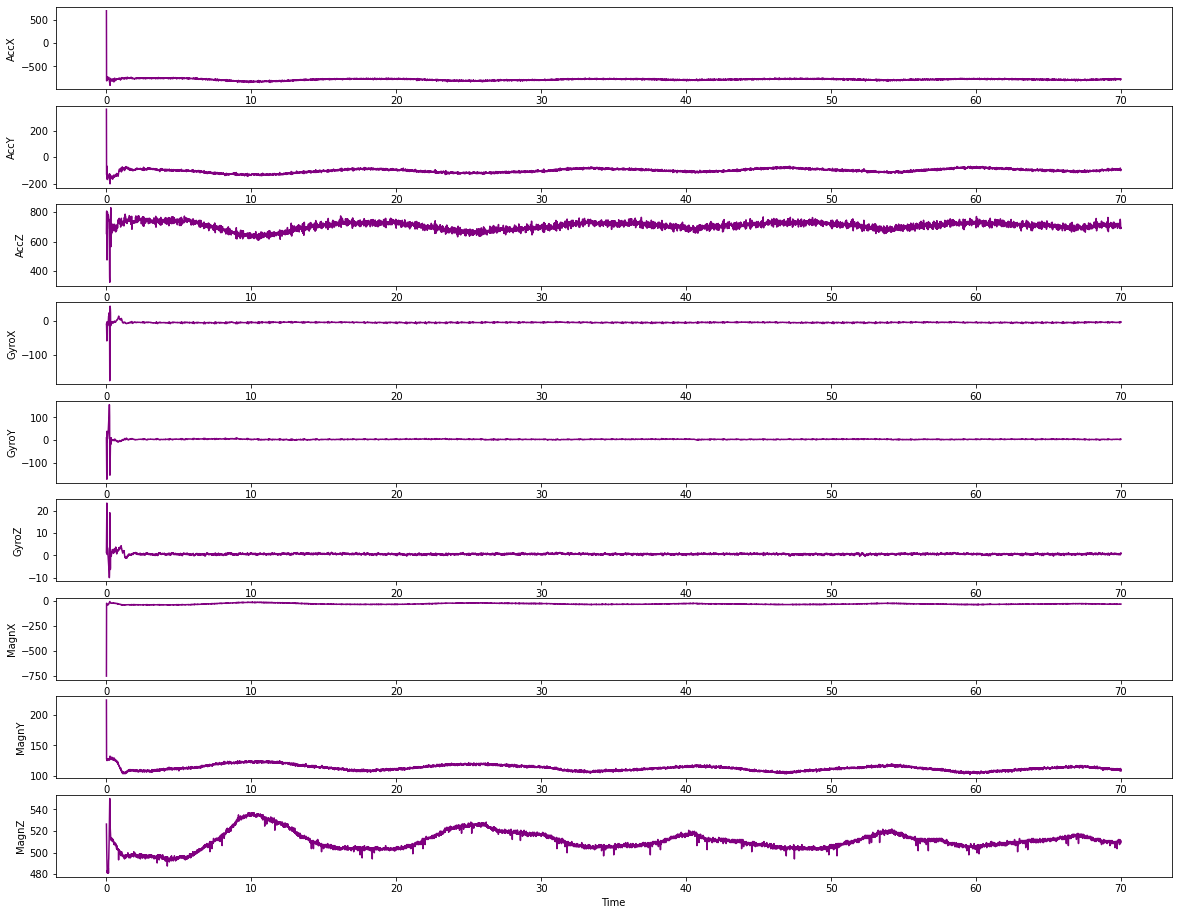

In [ ]:
fig, axes = plt.subplots(9, 1, figsize = (20, 16))
limits = np.linspace(0,df2.shape[0]/sampling_frequency,df2.shape[0])
for i ,axs in enumerate(axes.flat):
    axs.plot(limits, df2[labels[i]], color = 'purple')
    axs.set_xlabel('Time')
    axs.set_ylabel(labels[i])

# Time and Frequency Analysis

In [ ]:
# Statistical Analysis

In [ ]:
df2.drop(df2.columns[[0,1,2]],inplace=True,axis=1)
df2.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,-781.125368,-101.849421,707.450434,-5.576646,3.319115,0.648401,-33.198671,113.225776,510.880091
std,24.902340,15.513338,27.718855,2.825867,6.025490,0.615069,10.314981,4.867922,8.371977
min,-907.460490,-201.247270,324.476430,-174.999499,-172.841095,-9.902729,-755.923354,102.304179,481.169435
25%,-791.890863,-110.685812,692.399447,-6.097082,2.646764,0.463122,-37.440793,109.407914,505.559314
50%,-779.011414,-100.749635,711.180117,-5.609277,3.256520,0.585073,-33.974430,113.186663,510.281490
75%,-769.141603,-90.997508,725.966132,-5.121472,3.988227,0.828976,-29.775184,116.100403,515.053775
max,696.048332,360.120513,830.521399,41.829751,156.549205,23.389951,-9.273542,224.279571,550.049880


           AccX      AccY      AccZ     GyroX     GyroY     GyroZ     MagnX  \
AccX   1.000000  0.731474  0.535443  0.002278  0.044696 -0.008372 -0.939958   
AccY   0.731474  1.000000  0.652901 -0.049638 -0.006248 -0.014615 -0.717989   
AccZ   0.535443  0.652901  1.000000  0.147986 -0.025121 -0.047210 -0.438250   
GyroX  0.002278 -0.049638  0.147986  1.000000  0.260740 -0.413072  0.012129   
GyroY  0.044696 -0.006248 -0.025121  0.260740  1.000000 -0.736164 -0.027739   
GyroZ -0.008372 -0.014615 -0.047210 -0.413072 -0.736164  1.000000  0.005309   
MagnX -0.939958 -0.717989 -0.438250  0.012129 -0.027739  0.005309  1.000000   
MagnY -0.315877 -0.745499 -0.693512  0.010465 -0.003318  0.053634  0.223317   
MagnZ -0.617600 -0.631604 -0.829790 -0.035288 -0.031416  0.004664  0.498077   

          MagnY     MagnZ  
AccX  -0.315877 -0.617600  
AccY  -0.745499 -0.631604  
AccZ  -0.693512 -0.829790  
GyroX  0.010465 -0.035288  
GyroY -0.003318 -0.031416  
GyroZ  0.053634  0.004664  
MagnX  0.2233

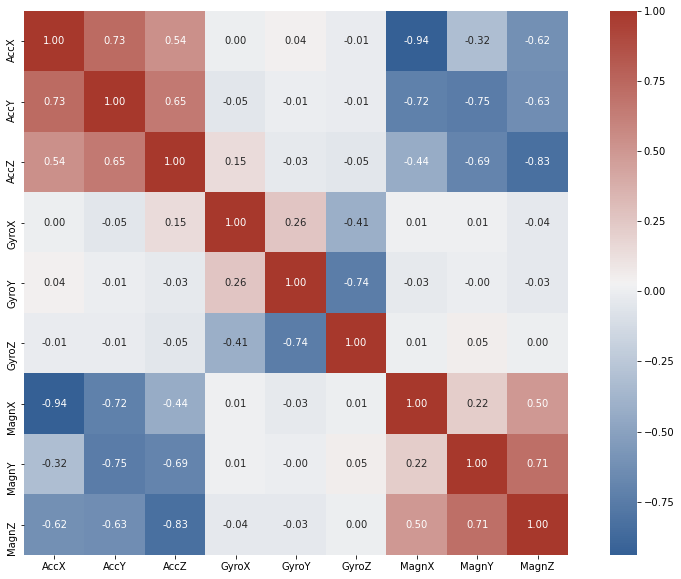

In [ ]:
#We wanted to find a correlation matrix in order to see the correlation among the variables. 
#Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize the data as a diagnostic for adcanced analyses
def plot_correlation_matrix(data):
    #this correlation matrix has coefficients ranges from 1 to -1, while -1 refers to negative correlation and +1 perfect positive correllation.
    plt.subplots(figsize=(15, 10))
    corr_matrix = data.corr() #Compute pairwise correlation of columns, excluding NA/null values
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True) #custom diverging palette with red blue and white to use it in the heatmap
    
    sns.heatmap(corr_matrix, annot=True, 
                fmt='.2f', square=True, cmap=cmap) #heatmap: a graphical representation of data that uses a system of color-coding to represent different values.
    return corr_matrix,corr_matrix

corr_matrix,correlation_coefficients = plot_correlation_matrix(df2)
print(correlation_coefficients)


# Fourier Analysis

In [ ]:
df2.columns

Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagnX', 'MagnY',
       'MagnZ'],
      dtype='object')

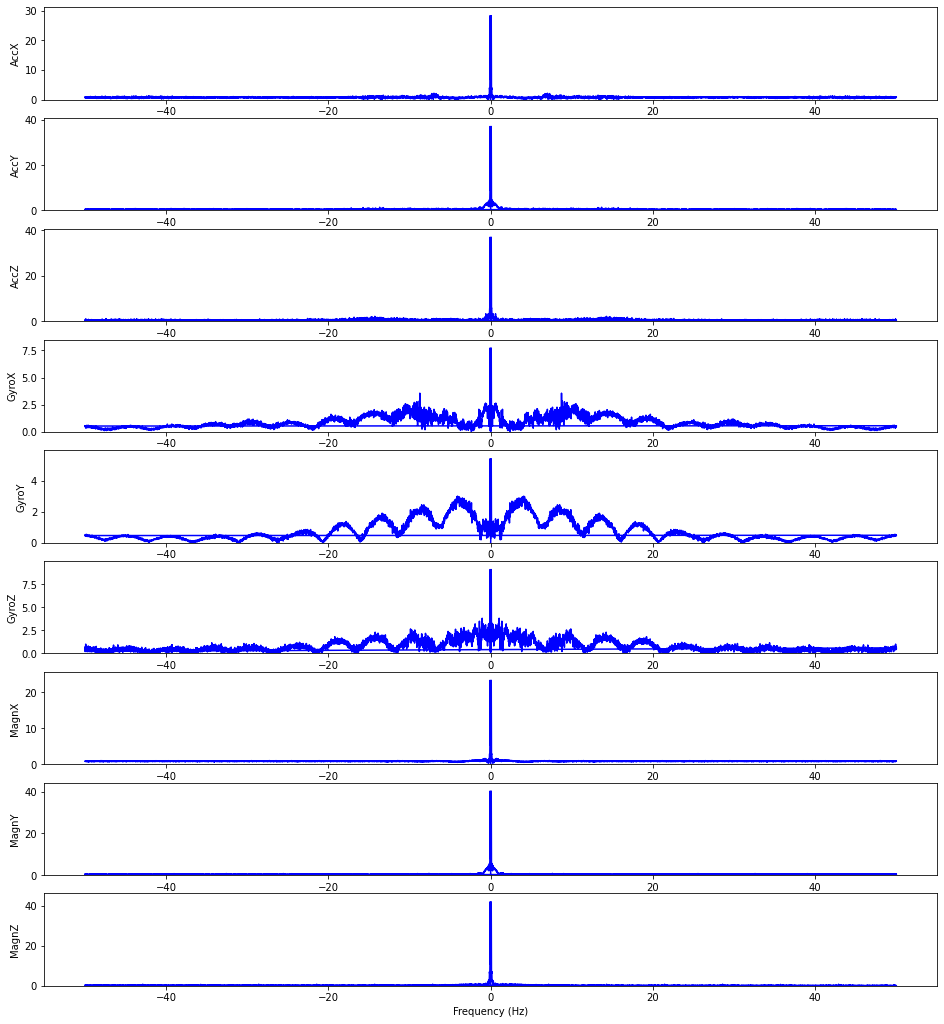

In [ ]:
from scipy import fft, signal, interpolate
from sklearn import preprocessing
#normalizing the data:
df_mean = df2.apply(np.mean)
df2 = df2- df_mean

#Subtracting the mean: (detrending the signal)
"""Generally, for signal analysis the FFT is used on signals of infinite 
length.  So, when you chop up your signal into finite-length segments, 
you are making an approximation.  Detrending the signal makes this 
approximation better"""



normalized_df = pd.DataFrame(preprocessing.normalize(df2, axis=0), columns=df2.columns)


fourier = normalized_df.apply(np.fft.fft)
absolute = fourier.apply(np.abs)

frequency = fft.fftfreq(absolute.shape[0] , d=1/100)


fig, axs = plt.subplots(9,1, figsize = (16,18))
for i, ax in enumerate(axs.flat):   
    az = np.array(absolute.iloc[:,i])
    find_peaks, _property = signal.find_peaks(az, distance=100)
    
        
    ax.set_ylim([0, az[find_peaks].max()*1.1])
    ax.plot(frequency, az, color='blue')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(absolute.columns[i])


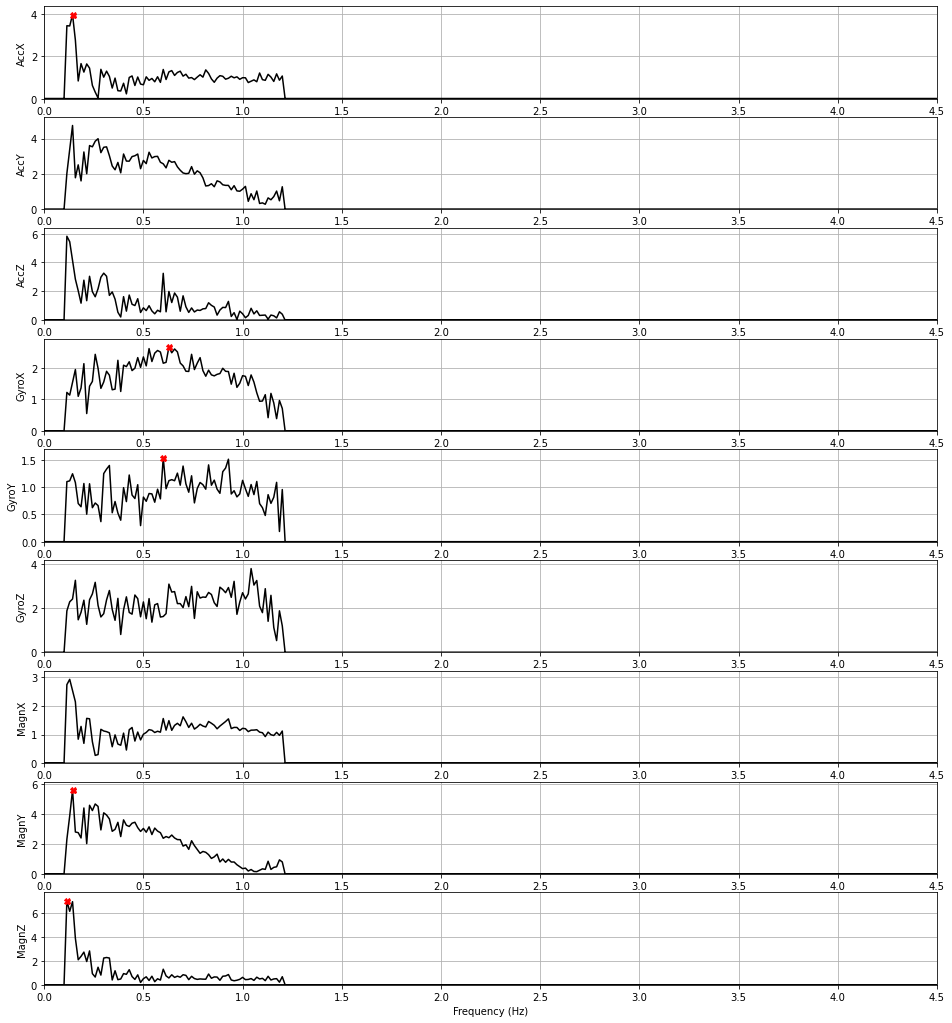

In [ ]:
f_low_cut = 0.1
f_high_cut = 1.2

peak_freq = []

fig, axs = plt.subplots(9,1, figsize = (16,18))

for i, ax in enumerate(axs.flat): 
    
    
    #### Filtering frequencies
    _d = np.array(absolute.iloc[:,i])
    _mask = np.where(np.abs(frequency) < f_low_cut)
    _d[_mask] = 0
    _mask = np.where(np.abs(frequency) > f_high_cut)
    _d[_mask] = 0

    
    # Finding freq. with peak power
    peak_freq.append(frequency[_d.argmax()])
        
    ax.plot(frequency, _d , color='black')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(absolute.columns[i])
    ax.grid()
    
    ax.set_xlim([0,4.5])
    ax.set_ylim([0, (_d[_d.argmax()])*1.1])
    ax.plot(frequency[_d.argmax()], _d[_d.argmax()], 'X', color='r')

The value with the highest peak is the value that affects the function the most after the inverse fourier transform. That's why we chose AccX and MagnX. When we look at the images, the highest peaks are here.
We chose AccX and MagnX because they have the highest peaks.

In [ ]:
normalized_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
0,0.709044,0.355951,-0.022395,-0.021803,0.012940,0.012989,-0.837503,0.272692,0.022193
1,-0.013080,-0.022718,0.040214,-0.037794,-0.165357,0.164668,0.007960,0.036157,-0.000656
2,-0.012977,-0.022631,0.043359,-0.145090,-0.291640,0.280797,0.005684,0.033760,-0.011443
3,-0.001001,0.026327,-0.008629,-0.226593,-0.349460,0.441955,-0.000114,0.031692,-0.023571
4,-0.007748,-0.044375,-0.099819,0.007084,0.070517,0.020099,-0.005905,0.029563,-0.039741
...,...,...,...,...,...,...,...,...,...
6995,0.004563,0.012700,0.013200,0.005536,-0.002301,-0.003601,-0.002907,-0.002159,-0.000817
6996,-0.002979,0.009271,0.008077,0.010179,-0.003027,0.003509,-0.002742,-0.009562,-0.000852
6997,-0.001939,-0.000350,-0.007906,0.005020,-0.000850,0.005879,-0.003974,-0.006958,0.000510
6998,0.001455,0.003788,-0.004290,0.002441,-0.000124,0.001139,-0.002852,-0.004627,-0.000829


In [ ]:
absolute = absolute.drop(absolute[frequency <= 0].index)
frequency = frequency[np.where(frequency> 0)]

In [ ]:
F = np.array(np.unique(peak_freq , return_counts=True))[0,-2:]
HR = F.max()
RR = F.min()
print(f'HR frequency is {HR:.2f} Hz, which is equal to {HR*60:.2f} beats per minute.')
print(f'RR frequency is {RR:.2f} Hz, which is equal to {RR*60:.2f} breath per minute.')

HR frequency is 0.63 Hz, which is equal to 37.71 beats per minute.
RR frequency is 0.60 Hz, which is equal to 36.00 breath per minute.


In [ ]:
normalized_df['AccX']

0       0.709044
1      -0.013080
2      -0.012977
3      -0.001001
4      -0.007748
          ...   
6995    0.004563
6996   -0.002979
6997   -0.001939
6998    0.001455
6999    0.004733
Name: AccX, Length: 7000, dtype: float64

#Filter

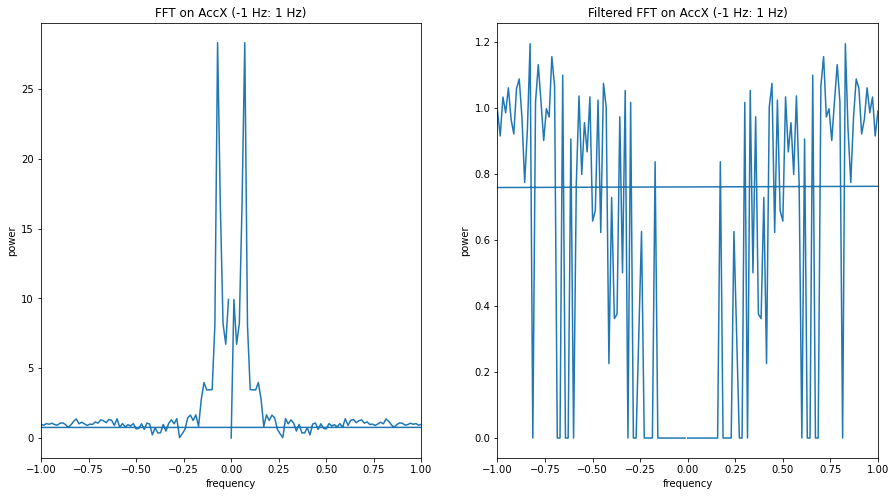

In [ ]:
df_accx = normalized_df['AccX'].to_numpy()
df_accx -= np.mean(df_accx)
df_accx_fft = fftpack.fft(df_accx)
power = np.abs(df_accx_fft)
freq = fftpack.fftfreq(df_accx.size, d=1/100)

x1,x2 = 0.1,1.2
filter_fft = np.where((np.abs(df_accx_fft)<x1) | (np.abs(df_accx_fft) >x2))
df_accx_fft[filter_fft] = 0

fig, ax = plt.subplots(1,2,figsize = (15,8))
ax[0].plot(freq,power)
ax[0].set_xlim(-1,1)
ax[0].set(xlabel="frequency", ylabel="power",title="FFT on AccX (-1 Hz: 1 Hz)")
ax[1].plot(freq,np.abs(df_accx_fft))
ax[1].set_xlim(-1,1)
ax[1].set(xlabel="frequency", ylabel="power",title="Filtered FFT on AccX (-1 Hz: 1 Hz)")
plt.show()

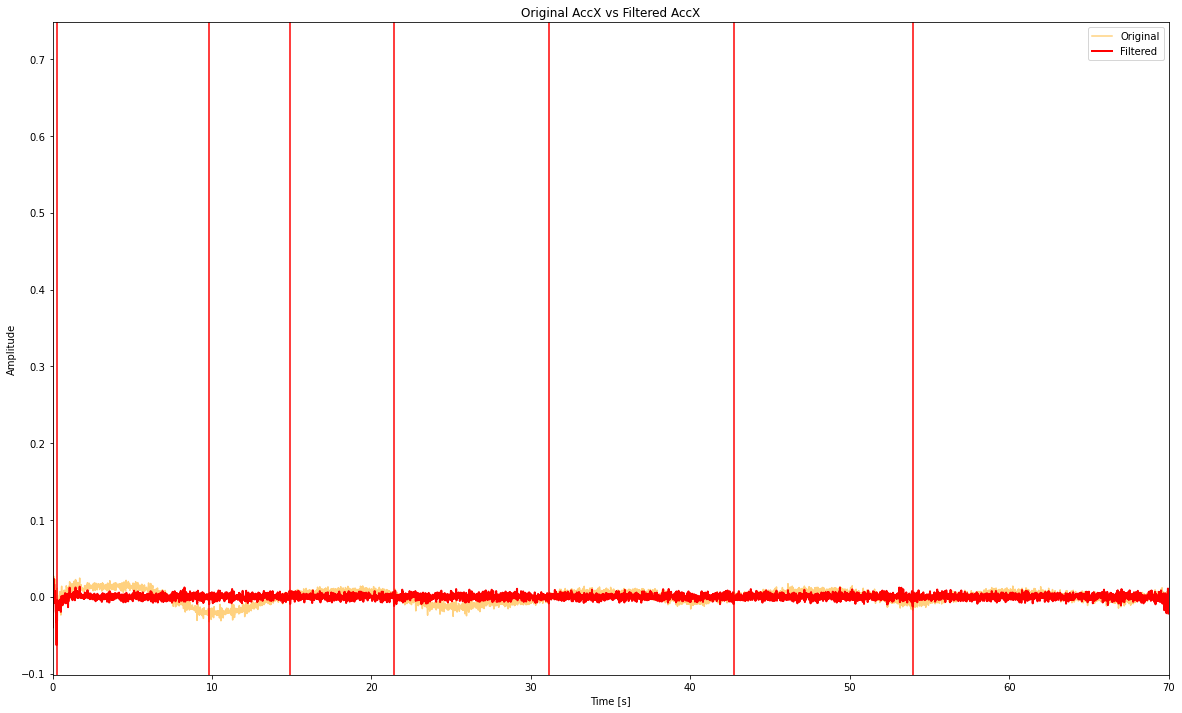

In [ ]:
filtered_sig = fftpack.ifft(df_accx_fft)
filtered_sig = np.real(filtered_sig)

plt.figure(figsize=(20, 12))
plt.plot(limits, normalized_df['AccX'], alpha=0.5, color='orange', label='Original')
plt.plot(limits, filtered_sig, linewidth=2, color='r', label='Filtered')

## Find minima of the filtered signal and plot them with a red line
idx_minima = signal.argrelextrema(filtered_sig, np.less, order = 500)
for i in idx_minima[0]:
    plt.axvline(limits[i], color = 'r')
    
plt.xlabel('Time [s]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(limits[0],limits[-1])
plt.title('Original AccX vs Filtered AccX')
plt.legend(loc='best')
plt.show()

We tried filtering for GyrX and GyrZ, but we got the AccX and MagnX values again because they conflicted.

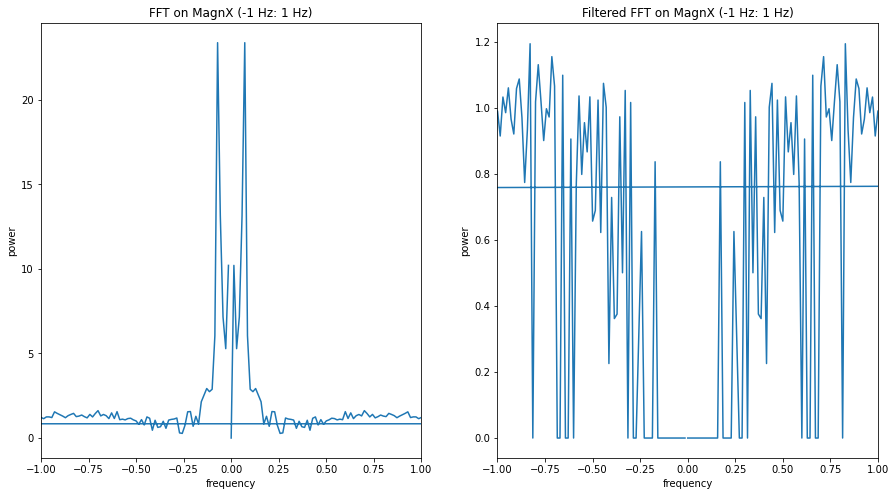

In [ ]:
df_magnx = normalized_df['MagnX'].to_numpy()
df_magnx -= np.mean(df_magnx)
df_magnx_fft = fftpack.fft(df_magnx)
power = np.abs(df_magnx_fft)
freq = fftpack.fftfreq(df_magnx.size, d=1/100)

x1,x2 = 0.1,0.6
filter_fft = np.where((np.abs(df_magnx_fft)<x1) | (np.abs(df_magnx_fft) >x2))
df_magnx_fft[filter_fft] = 0

fig, ax = plt.subplots(1,2,figsize = (15,8))
ax[0].plot(freq,power)
ax[0].set_xlim(-1,1)
ax[0].set(xlabel="frequency", ylabel="power",title="FFT on MagnX (-1 Hz: 1 Hz)")
ax[1].plot(freq,np.abs(df_accx_fft))
ax[1].set_xlim(-1,1)
ax[1].set(xlabel="frequency", ylabel="power",title="Filtered FFT on MagnX (-1 Hz: 1 Hz)")
plt.show()

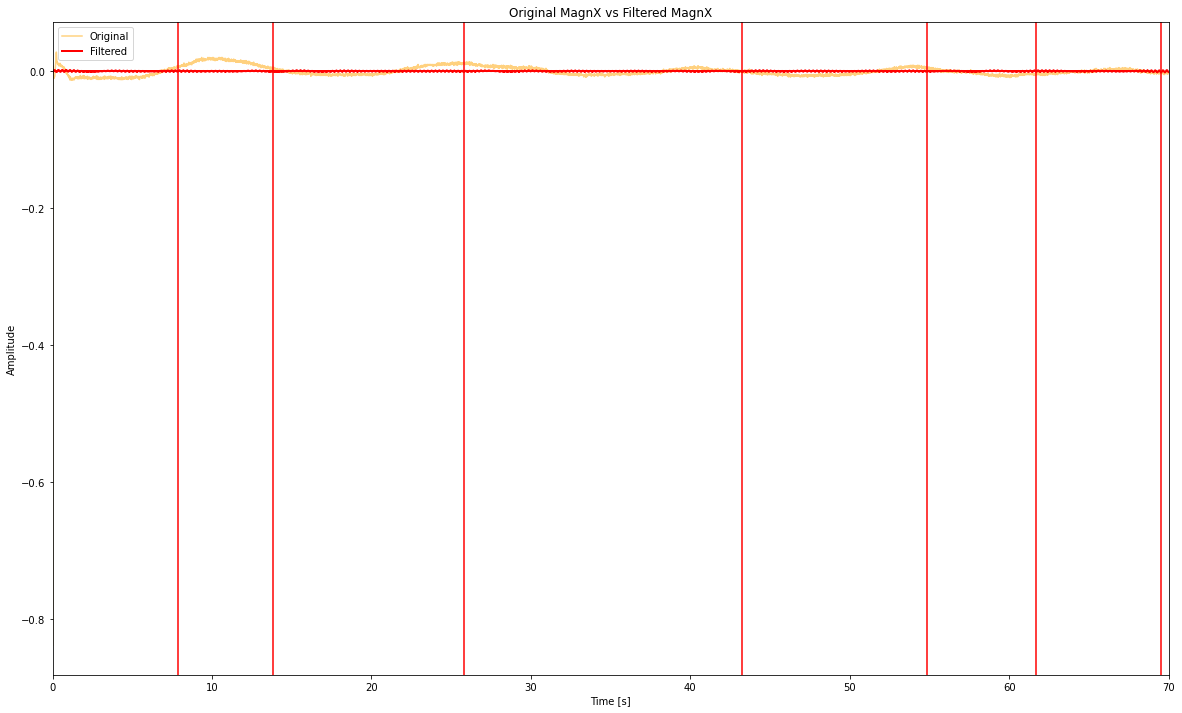

In [ ]:
filtered_sig = fftpack.ifft(df_magnx_fft)
filtered_sig = np.real(filtered_sig)

plt.figure(figsize=(20, 12))
plt.plot(limits, normalized_df['MagnX'], alpha=0.5, color='orange', label='Original')
plt.plot(limits, filtered_sig, linewidth=2, color='r', label='Filtered')

## Find minima of the filtered signal and plot them with a red line
idx_minima = signal.argrelextrema(filtered_sig, np.less, order = 500)
for i in idx_minima[0]:
    plt.axvline(limits[i], color = 'r')
    
plt.xlabel('Time [s]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(limits[0],limits[-1])
plt.title('Original MagnX vs Filtered MagnX')
plt.legend(loc='best')
plt.show()

# Respiratory rate per minute (RPM)

Duration of the dataset (excluding start-end noise): 60 seconds
Breaths in these 60 seconds:  7


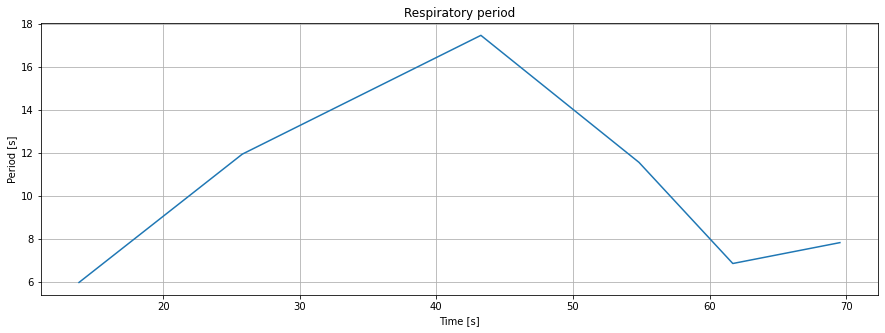

In [ ]:
total_breaths = len(idx_minima[0])

print('Duration of the dataset (excluding start-end noise): 60 seconds')
print('Breaths in these 60 seconds: ',total_breaths)

gaps = []

for i in idx_minima[0]:
    gaps.append(limits[i])
    
periods_diff = []

for i in range(len(gaps)):
    if(i>0):
        periods_diff.append(gaps[i]-gaps[i-1])
        
#plot the period vs time
plt.figure(figsize=(15,5))
plt.plot(gaps[1:],periods_diff)
plt.title("Respiratory period")
plt.xlabel('Time [s]')
plt.ylabel('Period [s]')
plt.grid()
plt.show()

#Respiratory rate variability (RRV)

Mean RRV (intended as period variability) calculated on whole dataset: 4.61 s


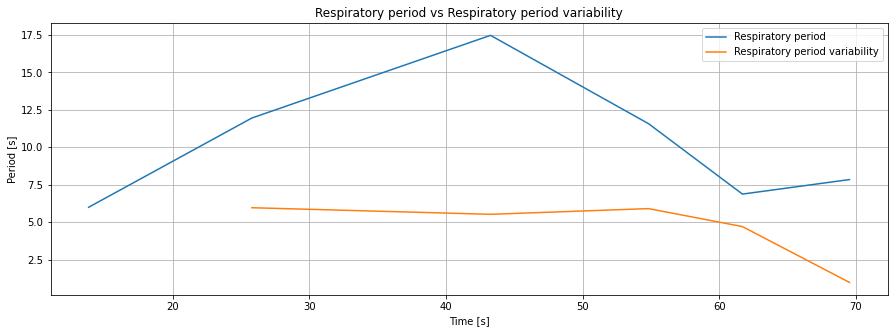

In [ ]:
from scipy.signal.waveforms import gausspulse
#plot the period variability vs time
periods_diff_diff = []
for i in range(len(periods_diff)):
    if(i>0):
        periods_diff_diff.append(abs(periods_diff[i]-periods_diff[i-1]))
        
mean_rrv = np.mean(periods_diff_diff) 
print("Mean RRV (intended as period variability) calculated on whole dataset:", round(mean_rrv,2), "s")

plt.figure(figsize=(15,5))
plt.plot(gaps[1:],periods_diff,label='Respiratory period')
plt.title("Respiratory period vs Respiratory period variability")
plt.plot(gaps[2:],periods_diff_diff,label='Respiratory period variability')
plt.xlabel('Time [s]')
plt.ylabel('Period [s]')
plt.grid()
plt.legend()
plt.show()

periods_diff = []

It follows a particular distribution.

# Conclusion

 Gerekli kütüphaneleri belirleyip onları ekledik.  ilk olarak center_sternum.txt dosyasını yükledik ve ilgilendiğimiz sütunları seçtik diğerlerini çıkardık. Verilen örnekleme frekansıyla her biri için 0dan başlayarak son sayıya kadar doğrusal ivme olan AccX,AccY ve AccZ değişkenlerine dayalı olarak verileri ayrıntılı olarak görmek iiçin grafiklerini çizdirdik. . 
Uygun bir zamanlama penceresi seçtik. Gürültülü olan aralıkların dışında kalan yerleri kısıtlayacak şekilde pencere seçtik. Bu analiz zaman penceresinin seçim prosedürünü etkilemiştir.

Kalibrasyon yaptık çünkü kullanılan dataların sapmalarını belirleyip hatalarını düzeltmemiz gerekiyordu. Böylece ölçüm zincirindeki tüm dataların doğruları kesinleştiği için ölçüm sonuçlarının güvenirliği sağlanır.

Kalibrasyondan çıkardığımız gürültülü verilerden sonra kalanları tabloya döktük. Aralık değerlerinin grafiğini çıkarttık.
 
İkinci kısımda zaman ve frekans analizi yaptık.Korelasyon katsayıları analizini yaparken ısı haritası ile yaptık çünkü çok daha iyi görünüyor ve korelasyon analizi için daha kolay. Görüldüğü üzere GyroX,GyroY,GyroZ arasındaki korelasyon katsayısı çok yüksek.

Ardından Fourier analizi yaptık. Sonsuz uzunluktaki bir sinyal içn FFT kullandık. Sinyalimiz sonlu uzunluklu parçalara böldüğümüzde sinyal eğiliminin bir yaklaşımını yapmış oluyoruz.

 
 Fourier analizini yaptığımızda öncelikle frekansları filtreledik ardından peak değerlerini de filtreledik. En yüksek tepe değeri, ters Fourier dönüşümünden sonra fonksiyonu en çok etkileyen değerdir. Bu nedenle AccX ve MagnZ'yi seçtik. Görüntülere baktığımızda en yüksek zirveler buradadır.
 
 Zaman domenine geçmeden önce 0dan küçük olan frekans değerlerini çıkardık. Çünkü zaman domeninde gerçek zamanı düşündüğümüz için 0dan küçük bir durum söz konusu olamaz.
 
 AccX i filtreledik ve bunun sonucu power değerlerini daha net analiz etmemizi sağladı.
 
 Ters Fourier dönüşümü yaparak original ve filtrelenmiş sinyali bir arada grafik olarak ortaya çıkardık. Filtrelenmiş Accx ve originaline bakarsak her bir zaman aralığı için filtrelenmiş sinyalin daha az genlik sapmasına sahip olduğunu görürüz.Burada bize verilen 200 Hz örnekleme sinyalini kullandık.
 
 Sonrasında aynı işlemleri MagnX için yaptık. Filtreleme sonucunda filtrelenmiş sinyalin zamanda daha az dağılmış bir sinyal olduğunu gördük.
 
 Respiratory Rate Per Minute (RPM) analiz ettik, histogramını yaptık. Sonuç olarak doğrusal olmayan bir sinyal çıktı.
 
  Respiratory Rate Variability (RRV) tahmin ettik. Solunum hızı değişmesi ölçümlerimizde stabil olamayan bir sonuç yaratacaktır. Respiratory Rate Per Minute ) was associated with greater Respiratory Rate Variability (RRV) than that of spontaneous breathing rate.
 
 
 4_chest_sweater.txt seçmemizin asıl nedeni diğerlerini denediğimizde mantıklı sonuçlar almamızdır.Üstte anlatılan bütün süreçler tekrarlandı.
 
 Analiz sonucunda AccX ve AccZ 80 Hz aralığında zirve yaptığından, sağlıklı bir insan kalp atışına daha yakın oldukları için alınabilirler.
 
 En yüksek tepe değerine sahip değer, ters fourier dönüşümünden sonra işlevi en çok etkileyen değerdir. Bu yüzden AccX ve MagnX'i seçtik. Görüntülere baktığımızda en yüksek zirveler burada. En yüksek tepe noktalarına sahip oldukları için AccX ve MagnX'i seçtik.

AccX e baktığımızda daha dar frekans aralığında powerın çok yüksek değerde olduğunu görürüz.Filtrelenmiş halinde bu fark çok büyük değildir.
Ters Fourier dönüşümü yapıldığında original ve filtrelenmiş sinyal arasında çok fark olmadığı görülecektir.

Bu işlemlerden önce GyrX ve GyrZ için filtrelemeyi denedik, ancak çakıştıkları için AccX ve MagnX değerlerini tekrar aldık.

Aynı işlemler MagnX için yapıldığında benzer sonuçların elde edildiği görülmektedir.

Respiratory rate per minute (RPM) grafiğini çizdirdiğimizde belirli bir dağılıma sahip  olduğunu görüyoruz. 

Respiratory rate variability (RRV)de doğrusal şekilde görülmektedir. RPM nin RRV ile ilişkili olduğunu görebiliriz.


İki farklı dataset için bakıldığında ikincisi ilkinden daha doğrusal bir sonuç vermiştir.